# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [82]:
!pip install textblob
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [63]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [64]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Starting off at Heathrow Te...
1,Not Verified | We have flown this route with ...
2,✅ Trip Verified | A last minute business trip ...
3,✅ Trip Verified | Overall I would say disapp...
4,Not Verified | LHR to Delhi in Business. Exce...


In [65]:
df.to_csv("C:/Users/joshu/Downloads/JobSimulations/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [66]:
print(df.head())

                                             reviews
0  ✅ Trip Verified |  Starting off at Heathrow Te...
1  Not Verified |  We have flown this route with ...
2  ✅ Trip Verified | A last minute business trip ...
3  ✅ Trip Verified |   Overall I would say disapp...
4  Not Verified |  LHR to Delhi in Business. Exce...


In [67]:

# Removing the "Not Verified |" and "✅ Trip Verified |" parts from the 'reviews' column
pattern = r'(.*?)(✅\s*Trip Verified|Not Verified)\s*\|\s*(.*)'

# Apply the regex to the 'reviews' column, replacing the matched string with just the part after the '|'
df['reviews'] = df['reviews'].apply(lambda x: re.sub(pattern, r'\3', x))

print(df.head())

                                             reviews
0  Starting off at Heathrow Terminal 3. Check in ...
1  We have flown this route with EasyJet regularl...
2  A last minute business trip to HND, a route I ...
3  Overall I would say disappointing. Due to BA s...
4  LHR to Delhi in Business. Exceptional flight. ...


In [97]:
row_number = 0
total_polarity = 0
total_subjectivity = 0
coordinates = []

for review in reviews:
    text = df['reviews'].iloc[row_number]
    blob = TextBlob(text)
    sentiment = blob.sentiment
    row_number += 1
    total_polarity += blob.sentiment.polarity
    total_subjectivity += blob.sentiment.subjectivity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    coordinates.append((polarity, subjectivity))
    print(blob.sentiment)
    
avg_polarity = total_polarity/len(reviews)
avg_subjectivity = total_subjectivity/len(reviews)
print("\n")
print("The polarity is scaled from -1 to 1, with -1 indicating a highly negative review while 1 indicates a highly")
print(f"positive review. The average polarity is {avg_polarity}")
print("The subjectivity is scaled from 0 to 1, with 0 indicating a highly objective review while 1 indicates a highly")
print(f"subjective review. The average subjectivity is {avg_subjectivity}")
      

Sentiment(polarity=0.2684510357815442, subjectivity=0.6007764739968129)
Sentiment(polarity=0.09311594202898553, subjectivity=0.5341415830546266)
Sentiment(polarity=0.07171677959721437, subjectivity=0.4783243929983059)
Sentiment(polarity=-0.12322916666666667, subjectivity=0.47180555555555553)
Sentiment(polarity=0.5037878787878788, subjectivity=0.6409090909090909)
Sentiment(polarity=0.5253333333333334, subjectivity=0.8620000000000001)
Sentiment(polarity=-0.15, subjectivity=0.5555555555555555)
Sentiment(polarity=-0.028571428571428574, subjectivity=0.5635714285714286)
Sentiment(polarity=0.16253561253561252, subjectivity=0.4430466524216525)
Sentiment(polarity=-0.45, subjectivity=0.4777777777777778)
Sentiment(polarity=-0.11923076923076922, subjectivity=0.5487179487179487)
Sentiment(polarity=-0.011190476190476186, subjectivity=0.5529761904761905)
Sentiment(polarity=0.12867424242424244, subjectivity=0.607418414918415)
Sentiment(polarity=-0.175, subjectivity=0.41250000000000003)
Sentiment(polar

Sentiment(polarity=0.04720853858784895, subjectivity=0.533032293377121)
Sentiment(polarity=0.09666666666666668, subjectivity=0.3066666666666667)
Sentiment(polarity=0.41111111111111115, subjectivity=0.6166666666666667)
Sentiment(polarity=-0.08971193415637856, subjectivity=0.49985302763080547)
Sentiment(polarity=0.20946969696969697, subjectivity=0.45098484848484843)
Sentiment(polarity=-0.22796378968253966, subjectivity=0.5632837301587301)
Sentiment(polarity=-0.23392857142857137, subjectivity=0.47619047619047616)
Sentiment(polarity=-0.2708333333333333, subjectivity=0.5402777777777777)
Sentiment(polarity=0.0062500000000000056, subjectivity=0.19375)
Sentiment(polarity=0.03582251082251083, subjectivity=0.45740259740259737)
Sentiment(polarity=0.1446819384319384, subjectivity=0.5522246272246272)
Sentiment(polarity=0.07129629629629629, subjectivity=0.442283950617284)
Sentiment(polarity=-0.05950980392156863, subjectivity=0.41000000000000003)
Sentiment(polarity=-0.45, subjectivity=0.525)
Sentimen

Sentiment(polarity=-0.024175824175824177, subjectivity=0.471978021978022)
Sentiment(polarity=0.25848484848484854, subjectivity=0.43575757575757573)
Sentiment(polarity=0.008265306122448983, subjectivity=0.4137414965986394)
Sentiment(polarity=0.23636363636363641, subjectivity=0.4871843434343434)
Sentiment(polarity=0.045, subjectivity=0.37555555555555553)
Sentiment(polarity=0.12183866312898571, subjectivity=0.4845040264395103)
Sentiment(polarity=-0.303125, subjectivity=0.5614583333333333)
Sentiment(polarity=-0.20625, subjectivity=0.5375)
Sentiment(polarity=0.4, subjectivity=0.85)
Sentiment(polarity=0.317948717948718, subjectivity=0.5397435897435897)
Sentiment(polarity=0.33571428571428574, subjectivity=0.445)
Sentiment(polarity=0.24495238095238098, subjectivity=0.46011111111111114)
Sentiment(polarity=0.026785714285714267, subjectivity=0.5703571428571428)
Sentiment(polarity=0.009649122807017541, subjectivity=0.4964912280701754)
Sentiment(polarity=0.0010353535353535281, subjectivity=0.524747

Sentiment(polarity=0.4706168831168831, subjectivity=0.6321753246753248)
Sentiment(polarity=-0.08583333333333334, subjectivity=0.49592592592592594)
Sentiment(polarity=0.06538461538461539, subjectivity=0.3217948717948718)
Sentiment(polarity=-0.024705882352941154, subjectivity=0.6529411764705884)
Sentiment(polarity=0.18541666666666667, subjectivity=0.4697916666666667)
Sentiment(polarity=0.331439393939394, subjectivity=0.41212121212121205)
Sentiment(polarity=-0.36, subjectivity=0.5)
Sentiment(polarity=-0.12499999999999994, subjectivity=0.6916666666666667)
Sentiment(polarity=0.35192982456140354, subjectivity=0.5745614035087719)
Sentiment(polarity=0.16020833333333334, subjectivity=0.438125)
Sentiment(polarity=-0.0002142857142856986, subjectivity=0.36398412698412697)
Sentiment(polarity=0.12667624521072798, subjectivity=0.5666666666666668)
Sentiment(polarity=0.1, subjectivity=0.65)
Sentiment(polarity=-0.025392156862745097, subjectivity=0.4051960784313725)
Sentiment(polarity=0.14261904761904762

Sentiment(polarity=0.20224489795918368, subjectivity=0.5485544217687075)
Sentiment(polarity=0.143366201699535, subjectivity=0.45007215007215007)
Sentiment(polarity=0.19388528138528136, subjectivity=0.5006493506493507)
Sentiment(polarity=0.09722222222222221, subjectivity=0.5157407407407408)
Sentiment(polarity=0.10714285714285715, subjectivity=0.47261904761904755)
Sentiment(polarity=-0.06933333333333333, subjectivity=0.49166666666666664)
Sentiment(polarity=0.24333333333333332, subjectivity=0.41750000000000004)
Sentiment(polarity=0.38782051282051283, subjectivity=0.6101282051282051)
Sentiment(polarity=0.1, subjectivity=0.45454545454545453)
Sentiment(polarity=0.2675720164609054, subjectivity=0.5898971193415637)
Sentiment(polarity=0.3691666666666667, subjectivity=0.5433333333333333)
Sentiment(polarity=-0.07260101010101011, subjectivity=0.5468434343434343)
Sentiment(polarity=0.06523809523809525, subjectivity=0.46928571428571436)
Sentiment(polarity=0.3791666666666667, subjectivity=0.641666666

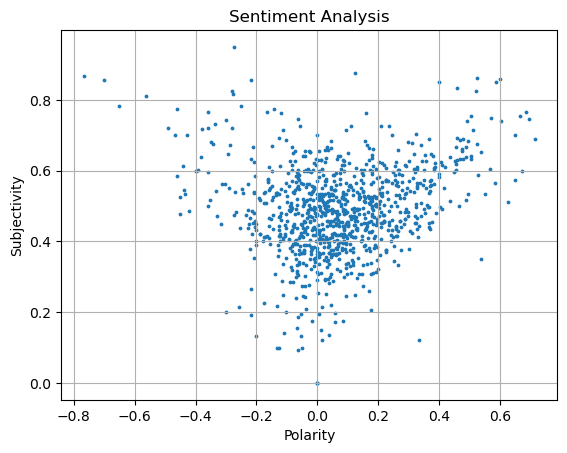

In [94]:
polarities, subjectivities = zip(*coordinates)  # This separates the polarities and subjectivities
plt.scatter(polarities, subjectivities, s = 3)  # Plot as scatter plot
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis')
plt.grid(True)
plt.show()

Parameters of the quadratic fit: a = 0.7779280634633862 b = -0.02627189376107974 c = 0.4550693992346852


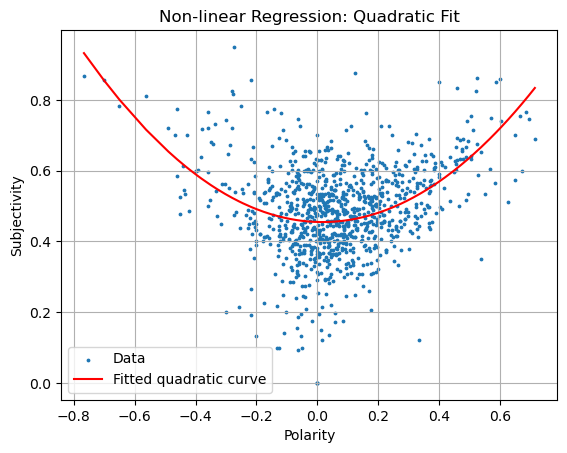

In [95]:
def quadratic(x, a, b, c): # We create the function that we want to fit into our non linear regression model
    return a * x**2 + b * x + c 

parameters, parameters_covariance = curve_fit(quadratic, polarities, subjectivities)

print("Parameters of the quadratic fit: a = {} b = {} c = {}".format(*parameters))

plt.scatter(polarities, subjectivities, label = 'Data', s = 3)
plt.plot(np.sort(polarities), quadratic(np.sort(polarities), *parameters), label = "Fitted quadratic curve", color = "red")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Non-linear Regression: Quadratic Fit")
plt.legend()
plt.grid(True)
plt.show()